<a href="https://colab.research.google.com/github/Bokocki/135UM-Homework/blob/main/Homework02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: EM Clustering in 2D**
-------------------------------

You have seen how the **Expectation-Maximization (EM)** algorithm can fit a Gaussian Mixture Model (GMM) to a 2D dataset. You should now explore:

## **Primary Question**

**How can we visualize the *decision boundary* for attributing a *new* (unlabeled) point to one of the GMM clusters?**  

In other words, given a 2D data distribution modeled by EM, think of a way to clearly show (on a plot) *which* cluster a point would be assigned to (or which cluster has the highest responsibility (posterior probability) for that point)?  

The plot should comprehensively cover the entire visible region, ensuring that for any point on the plot, it is immediately evident which cluster it would belong to. You can plot **lines** separating clusters or use a **color map** showing each point's "most likely cluster".

You can illustrate your approach with **the same** 2D dataset that we used in class, or you can find another suitable 2D dataset, it's up to you. Note however, that having 3 clusters enhances the clarity of the visualization—while 2 clusters result in overly simple boundaries, using 4 or more clusters can make the entire plot difficult to interpret. Try to choose a dataset with 3 clusters.

Discuss any irregularities observed in the resulting plot. If a decision boundary suggests that a region should be attributed to a cluster in a counterintuitive way (we saw it in class!), provide an explanation for why this might occur. It may be also an indication you have a bug in your code.

## **Secondary Question**

**If we *didn't know* the number of clusters in advance, how could we decide on a suitable $K$ for the clustering algorithm?**  

You can illustrate your approach with **the same** dataset as in the primary question by trying different values of $K$ (and optionally plotting the evaluation metric values, e.g. silhouette scores, etc.). Or you can find another suitable dataset, it's up to you. Note, that the dataset doesn't need to be 2D in this task.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Clearly **answers** both the **primary** and **secondary** questions with appropriate plots and short explanations.
     - Uses Python code (e.g. `scikit-learn` for GMM) to visualize:
       1. The **data** and **cluster assignments**.
       2. The **decision boundary** (lines or a color map) indicating each cluster's region.
       3. A demonstration (chart or table) of how you would pick a suitable number of clusters $K$ when it is not known.
   - Remember to use the `$` symbol to delimit **inline equations** and `$$` to delimit **full-line equations**.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.



# **Homework solution**

## **Visualisation of the decision boundaries**

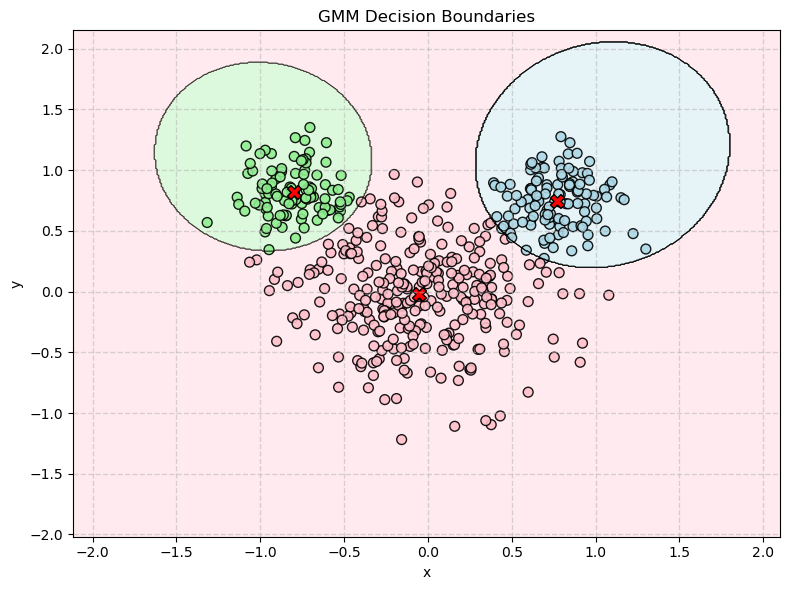

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.mixture import GaussianMixture

# ----------------------------------------------------------------------
# SECTION 1: Generate the "mouse" dataset
# ----------------------------------------------------------------------
np.random.seed(0)

# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
data_X = np.vstack([data1, data2, data3])

# ----------------------------------------------------------------------
# SECTION 2: Fit a Gaussian Mixture Model using scikit-learn
# ----------------------------------------------------------------------
K = 3  # Number of clusters
gmm = GaussianMixture(n_components=K, random_state=0)
gmm.fit(data_X)  # Fit the model to the data

# Get the parameters of the fitted GMM
pi = gmm.weights_  # Mixture weights
mu = gmm.means_    # Cluster means
Sigma = gmm.covariances_  # Cluster covariances

# Compute responsibilities for the original data
resp = gmm.predict_proba(data_X)

# ----------------------------------------------------------------------
# SECTION 3: Visualize the decision boundaries
# ----------------------------------------------------------------------

# Create a mesh grid covering the entire visible region
x_min, x_max = data_X[:, 0].min() - 0.8, data_X[:, 0].max() + 0.8
y_min, y_max = data_X[:, 1].min() - 0.8, data_X[:, 1].max() + 0.8
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Compute responsibilities for each point on the grid
grid_resp = gmm.predict_proba(grid_points)
grid_labels = np.argmax(grid_resp, axis=1)  # Assign to the cluster with the highest responsibility

# Reshape the grid labels for plotting
grid_labels = grid_labels.reshape(xx.shape)

# Define a custom colormap for the three clusters
cmap = ListedColormap(['pink', 'lightgreen', 'lightblue'])

# Plot the decision boundaries with colored regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_labels, cmap=cmap, alpha=0.3)

# Add contour lines to show the decision boundaries
plt.contour(xx, yy, grid_labels, colors='black', linewidths=0.2)

# Plot the original data points
plt.scatter(data_X[:, 0], data_X[:, 1], c=np.argmax(resp, axis=1), cmap=cmap, edgecolor='k', s=50, alpha=0.9)

# Plot cluster centers
plt.scatter(mu[:, 0], mu[:, 1], c='red', marker='X', s=100, edgecolor='k')

# Add titles and labels
plt.title('GMM Decision Boundaries')
plt.xlabel('x')
plt.ylabel('y')

# Improve layout and spacing
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)
plt.show()

## **Discussion of the decision boundaries**